<a id="1"></a>
# Student Performance Analysis 📈
This data set consists of the marks secured by the students in various subjects. Here we will try to understand the influence of the parents background, test preparation etc on students performance. Also we will try to analyze is there are any socio-economic pattern that could affect students to perform better on the exam.

<br>

#### Table of Contents
1. [Introduction](#1)
2. [Load Data and Libraries](#2)
3. [Data Understanding](#3)
    1. [Quick Look](#4)
    2. [Check Missing Data](#5)
    3. [Uniqueness Categorical Variable](#6)
    4. [Contionus Variable Characteristics](#7)
    5. [Recap Data Understanding](#8)
4. [Data Preparation](#9)
    1. [Student Final Score](#10)
    2. [Student Grade Guideline](#11)
    3. [Student Exam Status](#12)
    4. [Recap Data Preparation](#13)
5. [Exploratory and Data Visualization](#14)
    1. [Single Variable Characteristics](#15)
        1. [Summary](#16)
    2. [Relation Between Variables](#17)
        1. [Q1: Between male and female, which one tends to have higher grade and score?](#18)
        2. [Q2: Is there any difference score between each race/ethnicity?](#19)
        3. [Q3: Is there any difference score between each lunch?](#20)
        4. [Q4: Is taking test preparation course could guarantee students to pass the exam with higher score?](#21)
        5. [Q5: Does the education background of their parents affect to their performance?](#22)
        6. [Q6: How’s subjects score contribute to the final score?](#23)
        7. [Q7: Who is perform better on the exam?](#24)
    3. [Socio-Economic Analysis](#25)
6. [Conclusion](#26)
7. [Inspiration](#27)

<br>

##### *This is my very first public notebook data exploration. Please leave comments or suggestions to improve this notebook and give me another insight. Hope you like it 😊*

<a id="2"></a>
# Load Data and Libraries

In [2]:
# data wrangling
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
colors = sns.color_palette('pastel')[0:5]
import missingno as msno

# surpress warning
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('./input/students-performance-in-exams/StudentsPerformance.csv')

<a id="3"></a>
# Data Understanding

<a id="4"></a>
## Quick Look
Just a quick check.

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


We have 1000 records with 8 columns consists of 5 categorical variables and 3 continous variables.

<a id="5"></a>
## Check Missing Data
Missing data could affect our analysis. So we need to investigate is there any missing data in our dataset or not.

<AxesSubplot:>

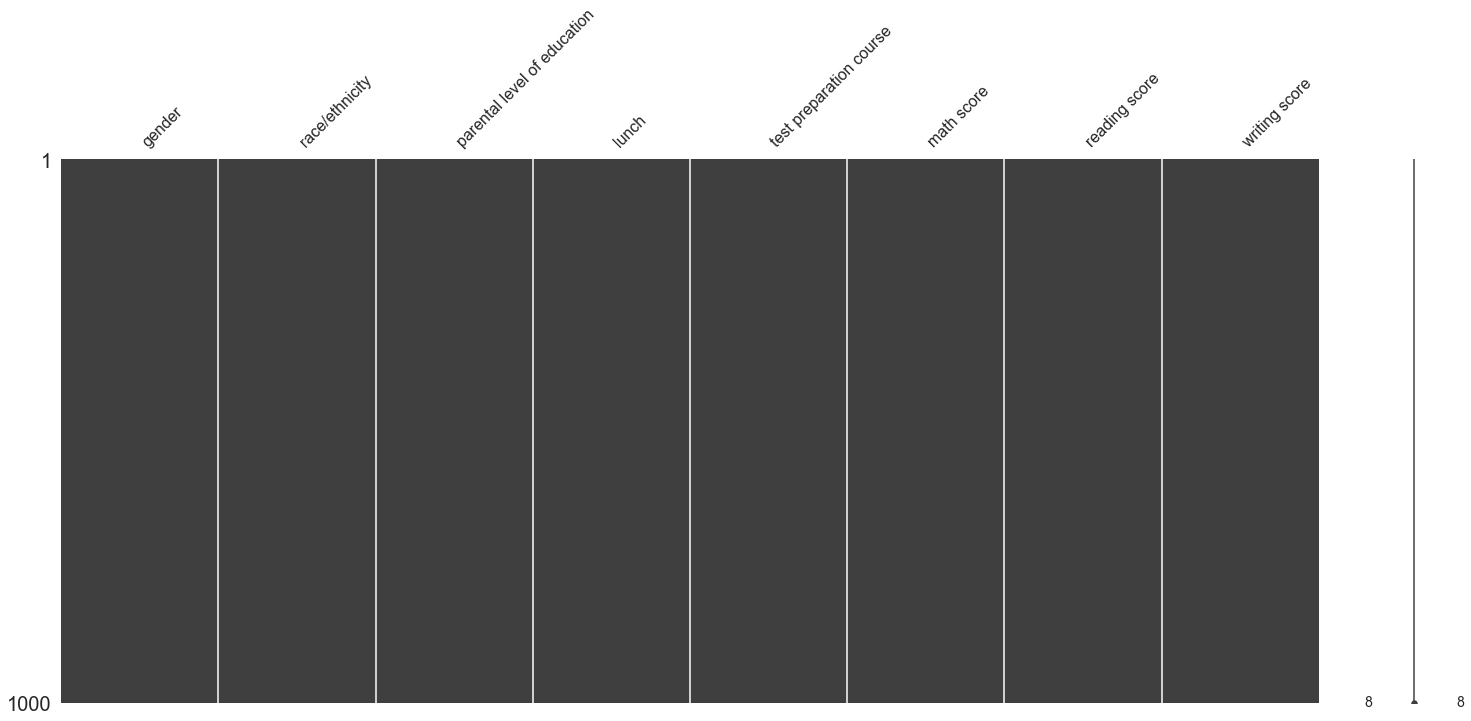

In [6]:
msno.matrix(df)

`missingno` is a great library to investigate missing data quickly. It can locate the missing data by showing a hole in the generated graph. As we can see in our graph above, there are no any single hole accross all variables, this means our dataset did not contains any missing data.

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

To make sure the `missingno` result, above we try to sum any null values from all variables. The result is we have no missing data, cool!

<a id="6"></a>
## Uniqueness Categorical Variables
Let's have a look at categorical variables. How many unique values of these variables.

In [8]:
categorical = df.select_dtypes(['category', 'object']).columns

for col in categorical:
    print('{} : {} unique value(s)'.format(col, df[col].nunique()))
    
print('\n-------------\n')

for col in categorical:
    print('{} : {}'.format(col, ', '.join(df[col].unique())))

gender : 2 unique value(s)
race/ethnicity : 5 unique value(s)
parental level of education : 6 unique value(s)
lunch : 2 unique value(s)
test preparation course : 2 unique value(s)

-------------

gender : female, male
race/ethnicity : group B, group C, group A, group D, group E
parental level of education : bachelor's degree, some college, master's degree, associate's degree, high school, some high school
lunch : standard, free/reduced
test preparation course : none, completed


Some of us might be confused with *some* term at `parental level of education` variable. But based on [a discussion](https://www.kaggle.com/spscientist/students-performance-in-exams/discussion/84882), *some* term means that they go to school or college but did not finished it. Now let's sort them in descending order to make clearer explanation.

<br>

**Parental Level of Education**
1. Master's Degree
2. Bachelor's Degree
3. Associate's Degree
4. Some College
5. High School
6. Some High School

<br>

Then we might also did not understand the meaning between *standard* and *free/reduced* value at `lunch` variable. [Here](https://www.kaggle.com/spscientist/students-performance-in-exams/discussion/194170) we get the great explanation. The value is directly correlated with parent's income tested in the US, where *free/reduced* lunch option is only available for students that their parent's income is below a certain level.

<a id="7"></a>
## Continous Variables Characteristics
Now let's see what about continous variables

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Here we found that each subject score used range between 0-100.

<a id="8"></a>
## Recap Data Understanding

After some quick look, this is some point that we have.

- We have total 1000 records and 8 columns (5 categorical + 3 continous)
- There are 5 race/ethnicity denoted by character A-E
- Parental Level of Education (desc. order)
    1. Master's Degree
    2. Bachelor's Degree
    3. Associate's Degree
    4. Some College
    5. High School
    6. Some High School
- There are 2 kinds of Lunch values:
    - Free/Reduced: only applicable to students with parent's income below certain level
    - Standard: default schema for all students
- Also, there are students that did take test preparation course and not
- For the continous variables, all three subjects are ranged between 0-100

<br>

Next, we will try to do some exploration and visualization. But we need to do some Data Preparation first.

<a id="9"></a>
# Data Preparation

<a id="10"></a>
## Student Final Score
To get more insight, let's take average from 3 subject's scores. Assume that average result will become students final score.

In [10]:
df['final score'] = df.apply(lambda x: (x['math score'] + x['reading score'] + x['writing score']) / 3, axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,final score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


<a id="11"></a>
## Student Grade Guideline
Since now we have a final score, let's define our own grading guideline based on their final score. (Inspiration [wikipedia](https://en.wikipedia.org/wiki/Grading_systems_by_country))

| Grade | Range  |    Description   |
| ----- | ------ | ---------------- |
| A     | 96-100 | Excellent        |
| AB    | 86-95  | Great            |
| B     | 76-85  | Good             |
| BC    | 66-75  | Average          |
| C     | 56-65  | Enough           |
| D     | 46-55  | Poor             |
| E     | 0-45   | Fail             |

In [11]:
def set_grade(score):
    if score >= 96: return 'A'
    if score >= 86: return 'AB'
    if score >= 76: return 'B'
    if score >= 66: return 'BC'
    if score >= 56: return 'C'
    if score >= 46: return 'D'
    else: return 'E'
    
df['grade'] = df.apply(lambda x: set_grade(x['final score']), axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,final score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,BC
1,female,group C,some college,standard,completed,69,90,88,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,AB
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,D
4,male,group C,some college,standard,none,76,78,75,76.333333,B


<a id="12"></a>
## Student Exam Status
Let's make this more interesting by adding a column representing student passed the exam or not. Here we will define 3 different status, spesifically:
- **Pass**: students scored well on exam. grade ranged between A - BC.
- **Remedy**: students passed the exam but they need to take remedial exam. grade ranged between C - D.
- **Fail**: students failed the exam. the grade is E.

In [12]:
def pass_or_not(grade):
    if grade in ['A', 'AB', 'AB', 'B', 'BC']: return 'pass'
    if grade in ['C', 'D']: return 'remedy'
    else: return 'fail'

df['exam status'] = df.apply(lambda x: pass_or_not(x['grade']), axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,final score,grade,exam status
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,BC,pass
1,female,group C,some college,standard,completed,69,90,88,82.333333,B,pass
2,female,group B,master's degree,standard,none,90,95,93,92.666667,AB,pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,D,remedy
4,male,group C,some college,standard,none,76,78,75,76.333333,B,pass


<a id="13"></a>
## Recap Data Preparation
Great, so far here what we done.

- Taking average from three subjects score and stored in new column called *final score*
- Created our own student's grading guideline based on our generated final *score columns* in *grade* column
- Last, based on our 2 new columns, we create *exam status* column stated whether student is passed, need remedial exam, or failed.

<br>

Next, we will try to gain insight by exploring and visualize our prepared data.

<a id="14"></a>
# Exploratory and Data Visualization

<a id="15"></a>
## Single Variable Characteristics
Let's see what we can get by looking at each variable

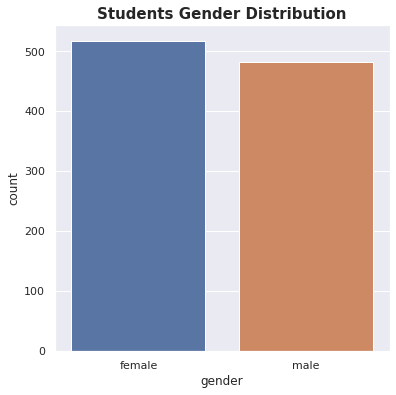

total male students: 482
total female students: 518


In [12]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='gender')
plt.title('Students Gender Distribution', fontsize=15, fontweight='bold')
plt.show()

print('total male students: {}'.format(len(df[df.gender == 'male'])))
print('total female students: {}'.format(len(df[df.gender == 'female'])))

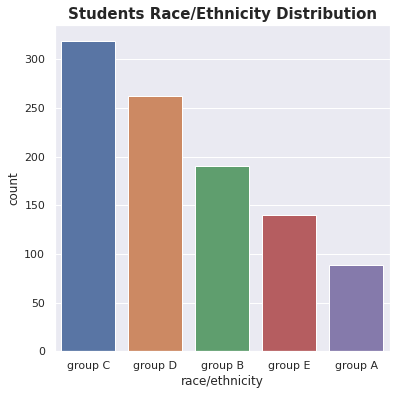

total group C students: 319
total group D students: 262
total group B students: 190
total group E students: 140
total group A students: 89


In [13]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='race/ethnicity', order=df['race/ethnicity'].value_counts().index)
plt.title('Students Race/Ethnicity Distribution', fontsize=15, fontweight='bold')
plt.show()

ethnic = list(df['race/ethnicity'].value_counts().index)
for e in ethnic:
    print('total {} students: {}'.format(e, len(df[df['race/ethnicity'] == e])))

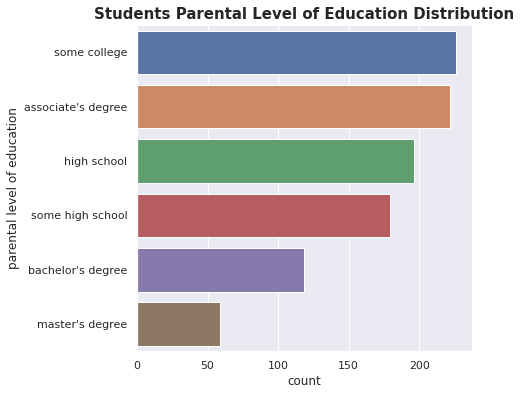

total students with parent level of education some college: 226
total students with parent level of education associate's degree: 222
total students with parent level of education high school: 196
total students with parent level of education some high school: 179
total students with parent level of education bachelor's degree: 118
total students with parent level of education master's degree: 59


In [14]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, y='parental level of education', order=df['parental level of education'].value_counts().index)
plt.title('Students Parental Level of Education Distribution', fontsize=15, fontweight='bold')
plt.show()

education = list(df['parental level of education'].value_counts().index)
for e in education:
    print('total students with parent level of education {}: {}'.format(e, len(df[df['parental level of education'] == e])))

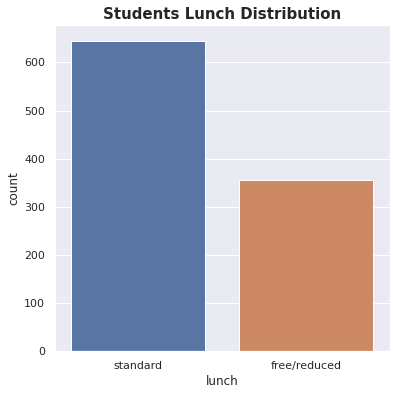

total students with standard lunch: 645
total students with free/reduced lunch: 355


In [15]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='lunch')
plt.title('Students Lunch Distribution', fontsize=15, fontweight='bold')
plt.show()

print('total students with standard lunch: {}'.format(len(df[df.lunch == 'standard'])))
print('total students with free/reduced lunch: {}'.format(len(df[df.lunch == 'free/reduced'])))

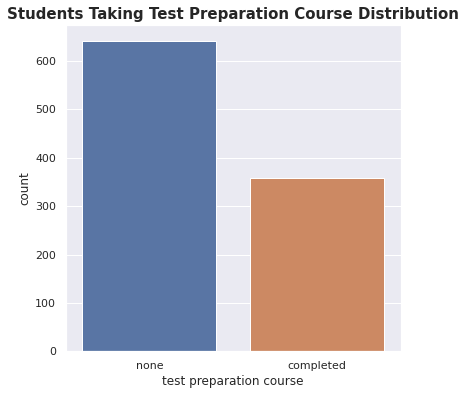

total students not taking test preparation course: 642
total students taking test preparation course: 358


In [16]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='test preparation course')
plt.title('Students Taking Test Preparation Course Distribution', fontsize=15, fontweight='bold')
plt.show()

print('total students not taking test preparation course: {}'.format(len(df[df['test preparation course'] == 'none'])))
print('total students taking test preparation course: {}'.format(len(df[df['test preparation course'] == 'completed'])))

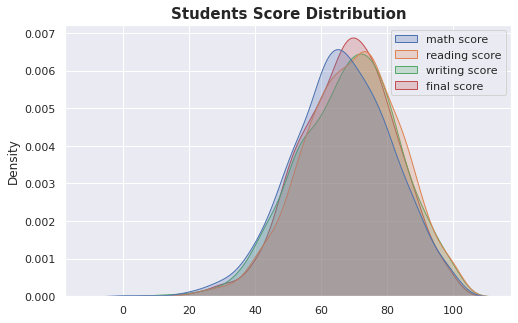

average math score: 66.089
average reading score: 69.169
average writing score: 68.054
average final score: 67.77066666666664


In [17]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, shade=True)
plt.title('Students Score Distribution', fontsize=15, fontweight='bold')
plt.show()

print('average math score: {}'.format(df['math score'].mean()))
print('average reading score: {}'.format(df['reading score'].mean()))
print('average writing score: {}'.format(df['writing score'].mean()))
print('average final score: {}'.format(df['final score'].mean()))

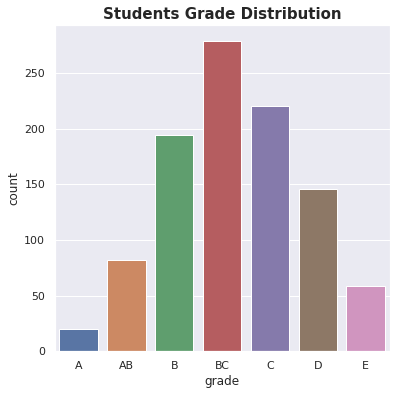

total students with grade A: 20
total students with grade AB: 82
total students with grade B: 194
total students with grade BC: 279
total students with grade C: 220
total students with grade D: 146
total students with grade E: 59


In [18]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='grade', order=df['grade'].sort_values().unique())
plt.title('Students Grade Distribution', fontsize=15, fontweight='bold')
plt.show()

grades = list(df['grade'].sort_values().unique())
for g in grades:
    print('total students with grade {}: {}'.format(g, len(df[df['grade'] == g])))

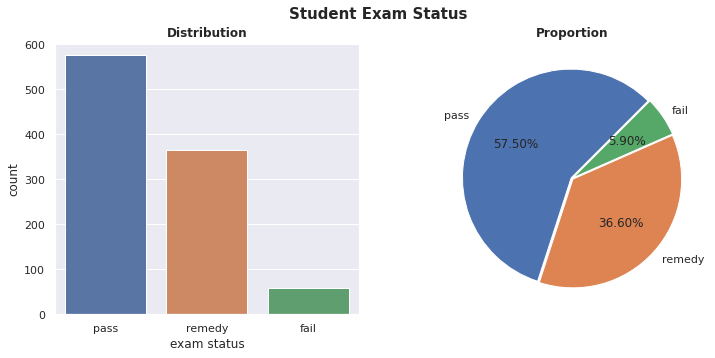

total students pass in exam: 575
total students remedy in exam: 366
total students fail in exam: 59


In [19]:
# visualize multi-plot by subplots(row, col) method
fig, ax = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Student Exam Status', fontsize=15, fontweight='bold')

# student exam status distribution
sns.countplot(ax=ax[0], data=df, x='exam status')
ax[0].set_title('Distribution', fontweight='bold')

# student exam status proportion
ax[1].pie(df['exam status'].value_counts(), labels=df['exam status'].unique(), \
        autopct='%1.2f%%', startangle=45, explode=[0.01,0.01, 0.01])
ax[1].set_title('Proportion', fontweight='bold')

plt.show()

exams = df['exam status'].unique()
for e in exams:
    print('total students {} in exam: {}'.format(e, len(df[df['exam status'] == e])))

<a id="16"></a>
### Summary Single Variable Characteristics
Here are some ideas that we can take:
- **Female** students distribution is **higher** than **male** students
- **Group C** race/ethnic is the **majority**, while **group A** is the **minority**
- **Most of the parents** was going to college but then **didn't finished their college**. While total **parents with high education** even **not greater than** parents that **didn't finish their high school**.
- Total students with **standard lunch** is **higher** than the **free/reduced** one, this also means that most of their parents income is **quite enough**. But since total students that get **free/reduced** lunch is **more than half** of the **standard** one, this also means that there are quite **a lot** of parents with income **below certain level**.
- Students who **didn't take** test preparation is **twice** bigger than the **took** one.
- For **all subjects scores** and the **final score** have an **average between 66-69**. This is also confirm the **most grade** that achieved by students is **BC** which has score range between 66-75.
- Interestingly, **most of students passed the exam** even **some** of them **need** to take **remedial exam**.

<a id="17"></a>
## Relation Between Variables

<a id="18"></a>
**Q: Between male and female, which one tends to have higher grade and score?**

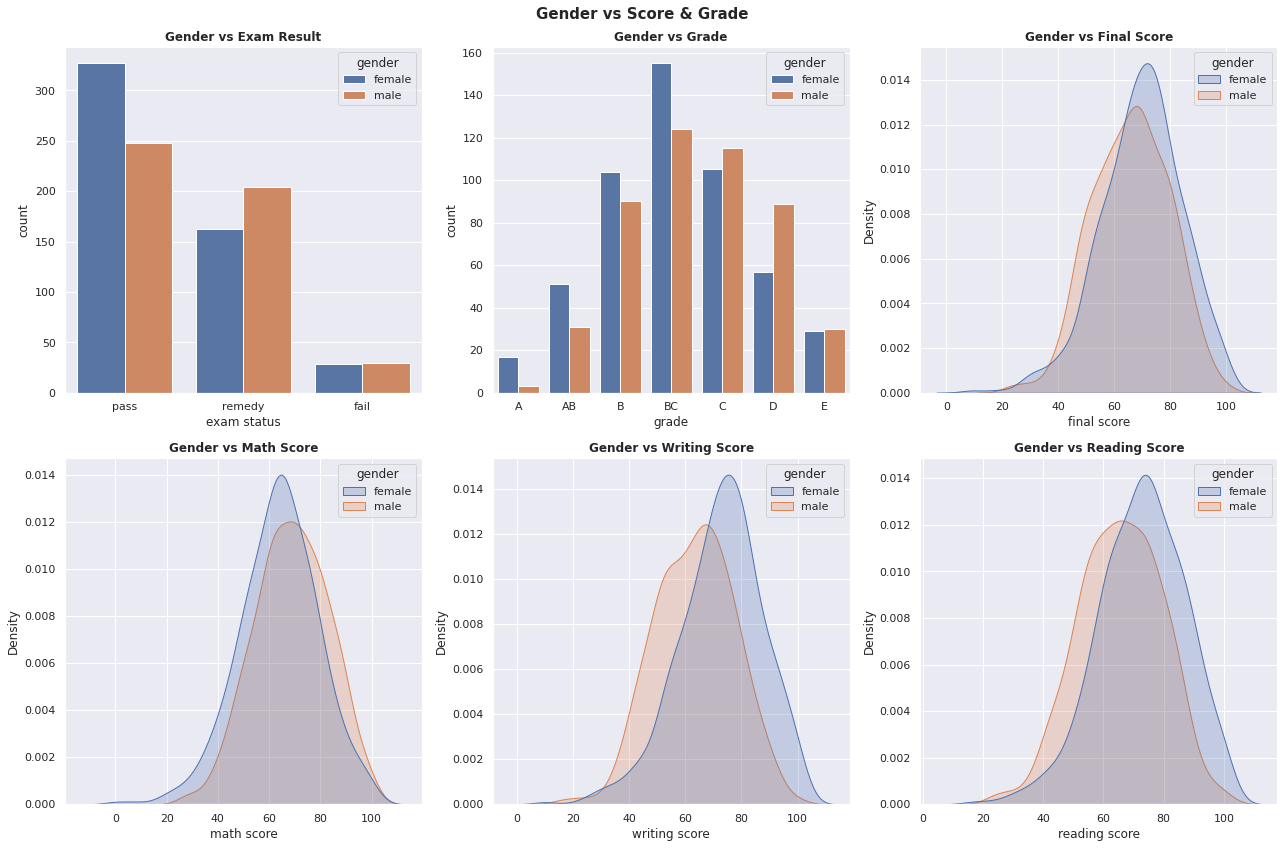

In [20]:
# visualize data using plt.subplot()
plt.figure(figsize=(18,12))
plt.suptitle('Gender vs Score & Grade', fontweight='bold', fontsize=15)

# gender vs exam result
plt.subplot(231)
sns.countplot(data=df, x='exam status', hue='gender')
plt.title('Gender vs Exam Result', fontweight='bold')

# gender vs grade
plt.subplot(232)
sns.countplot(data=df, x='grade', hue='gender', order=df['grade'].sort_values().unique())
plt.title('Gender vs Grade', fontweight='bold')

# gender vs final score
plt.subplot(233)
sns.kdeplot(data=df, x='final score', hue='gender', shade=True)
plt.title('Gender vs Final Score', fontweight='bold')

# gender vs math score
plt.subplot(234)
sns.kdeplot(data=df, x='math score', hue='gender', shade=True)
plt.title('Gender vs Math Score', fontweight='bold')

# gender vs writing score
plt.subplot(235)
sns.kdeplot(data=df, x='writing score', hue='gender', shade=True)
plt.title('Gender vs Writing Score', fontweight='bold')

# gender vs reading score
plt.subplot(236)
sns.kdeplot(data=df, x='reading score', hue='gender', shade=True)
plt.title('Gender vs Reading Score', fontweight='bold')

plt.tight_layout()
plt.show()


# print detailed value
# print('Exam Result by Gender')
# print('---------------------')
# exams = df.groupby(['gender'])['exam status'].value_counts()
# exams = exams.unstack(level=1)
# for gender in exams.index:
#     for result in exams.columns:
#         print('total {} students {} exams: {}'.format(gender, result, exams.loc[gender, result]))
#     print()
# print()

# print('Grade by Gender')
# print('---------------')
# grades = df.groupby(['gender'])['grade'].value_counts()
# grades = grades.unstack(level=1)
# for gender in grades.index:
#     for grade in grades.columns:
#         print('total {} students get {} grade: {}'.format(gender, grade, grades.loc[gender, grade]))
#     print()

**Answer:**
Interesting! It looks like female dominates the good score and grade. The female passing rate at exam also higher than male, even some of them also needs remedy, but the total female who need remedy is lower than male. At the average score, which we determined from `final score` we can see that female students perform better by scoring better than male students. But, the most interesting part is if we try to zoom in at math score, the average of male student's score is a bit better than female students. So, at some point we might curious what else variables that could contribute for student to score better.

<a id="19"></a>
**Q: Is there any difference score between each race/ethnicity?**

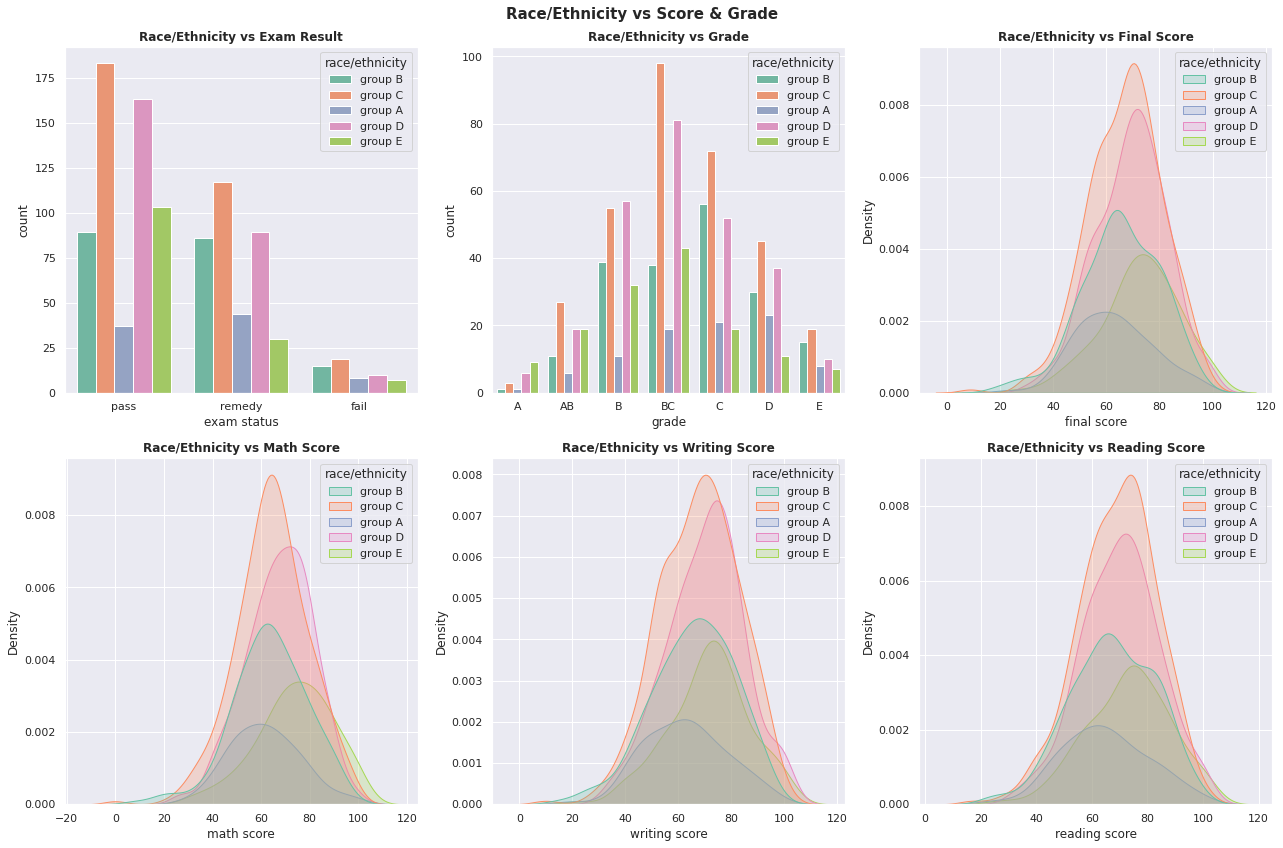

In [21]:
sns.set_palette("Set2")
# visualize data using plt.subplot()
plt.figure(figsize=(18,12))
plt.suptitle('Race/Ethnicity vs Score & Grade', fontweight='bold', fontsize=15)

# gender vs exam result
plt.subplot(231)
sns.countplot(data=df, x='exam status', hue='race/ethnicity')
plt.title('Race/Ethnicity vs Exam Result', fontweight='bold')

# gender vs grade
plt.subplot(232)
sns.countplot(data=df, x='grade', hue='race/ethnicity', order=df['grade'].sort_values().unique())
plt.title('Race/Ethnicity vs Grade', fontweight='bold')

# gender vs final score
plt.subplot(233)
sns.kdeplot(data=df, x='final score', hue='race/ethnicity', shade=True)
plt.title('Race/Ethnicity vs Final Score', fontweight='bold')

# gender vs math score
plt.subplot(234)
sns.kdeplot(data=df, x='math score', hue='race/ethnicity', shade=True)
plt.title('Race/Ethnicity vs Math Score', fontweight='bold')

# gender vs writing score
plt.subplot(235)
sns.kdeplot(data=df, x='writing score', hue='race/ethnicity', shade=True)
plt.title('Race/Ethnicity vs Writing Score', fontweight='bold')

# gender vs reading score
plt.subplot(236)
sns.kdeplot(data=df, x='reading score', hue='race/ethnicity', shade=True)
plt.title('Race/Ethnicity vs Reading Score', fontweight='bold')

plt.tight_layout()
plt.show()

**Answer:** From the graph above, we can see that `group E` race perform better among the other races. Even the total of their race is below 150 students, but their performance is great. At some points they might have a little competition with the `group D` as can we see at the `writing score` and `math score`. Even the most student achieved **grade A** is come from *group E* race, it turns out that this race students mostly achieved **grade BC**. For another races we can see that `group C` and `group D` has similar performance. We might seen that `group C` looks like more dominated than `group D`, this is because the `group C` is the race with the highest students number.

<a id="20"></a>
**Q: Is there any difference score between each lunch?**

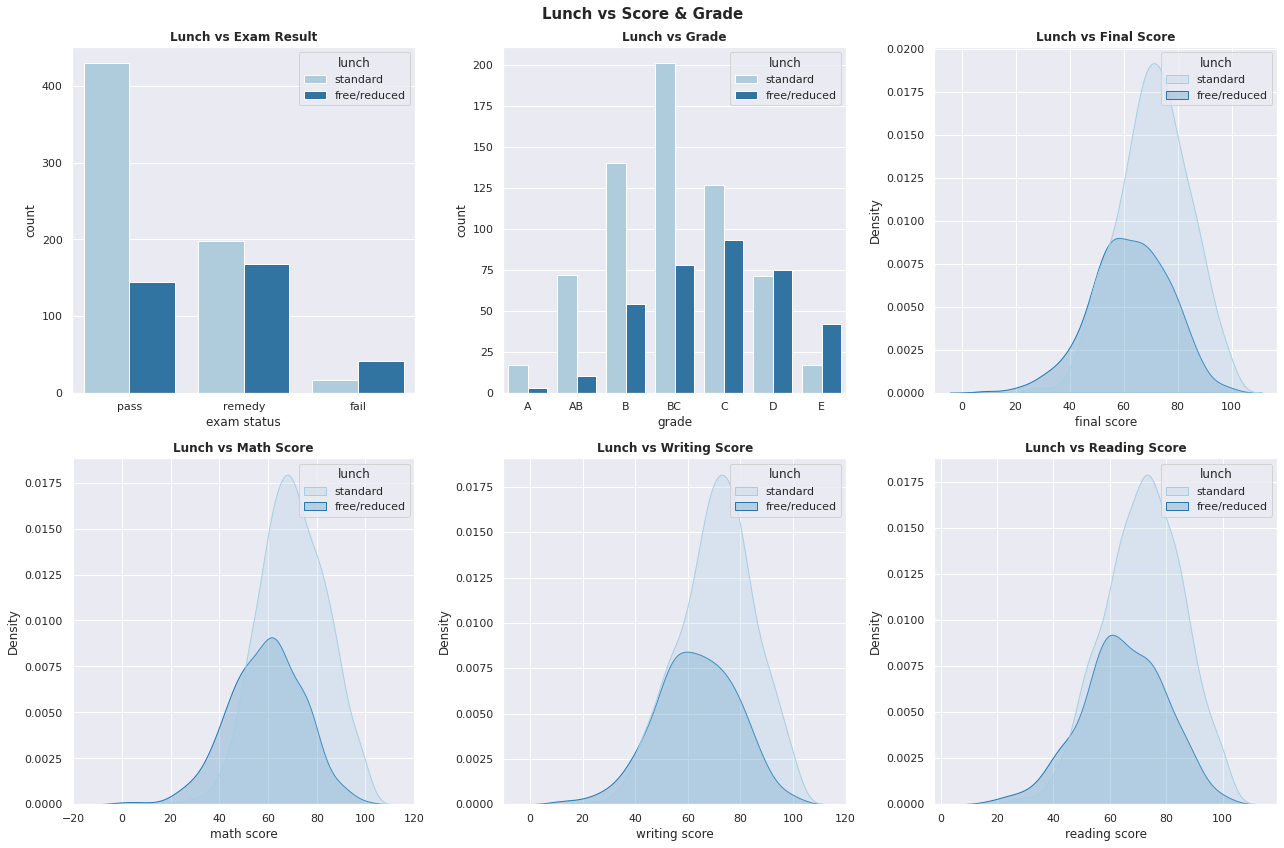

In [22]:
sns.set_palette("Paired")
# visualize data using plt.subplot()
plt.figure(figsize=(18,12))
plt.suptitle('Lunch vs Score & Grade', fontweight='bold', fontsize=15)

# gender vs exam result
plt.subplot(231)
sns.countplot(data=df, x='exam status', hue='lunch')
plt.title('Lunch vs Exam Result', fontweight='bold')

# gender vs grade
plt.subplot(232)
sns.countplot(data=df, x='grade', hue='lunch', order=df['grade'].sort_values().unique())
plt.title('Lunch vs Grade', fontweight='bold')

# gender vs final score
plt.subplot(233)
sns.kdeplot(data=df, x='final score', hue='lunch', shade=True)
plt.title('Lunch vs Final Score', fontweight='bold')

# gender vs math score
plt.subplot(234)
sns.kdeplot(data=df, x='math score', hue='lunch', shade=True)
plt.title('Lunch vs Math Score', fontweight='bold')

# gender vs writing score
plt.subplot(235)
sns.kdeplot(data=df, x='writing score', hue='lunch', shade=True)
plt.title('Lunch vs Writing Score', fontweight='bold')

# gender vs reading score
plt.subplot(236)
sns.kdeplot(data=df, x='reading score', hue='lunch', shade=True)
plt.title('Lunch vs Reading Score', fontweight='bold')

plt.tight_layout()
plt.show()

**Answer:** It could be seen that students having a standard meal perform better than the free/reduced one.

<a id="21"></a>
**Q: Is taking test preparation course could guarantee students to pass the exam with higher score?**

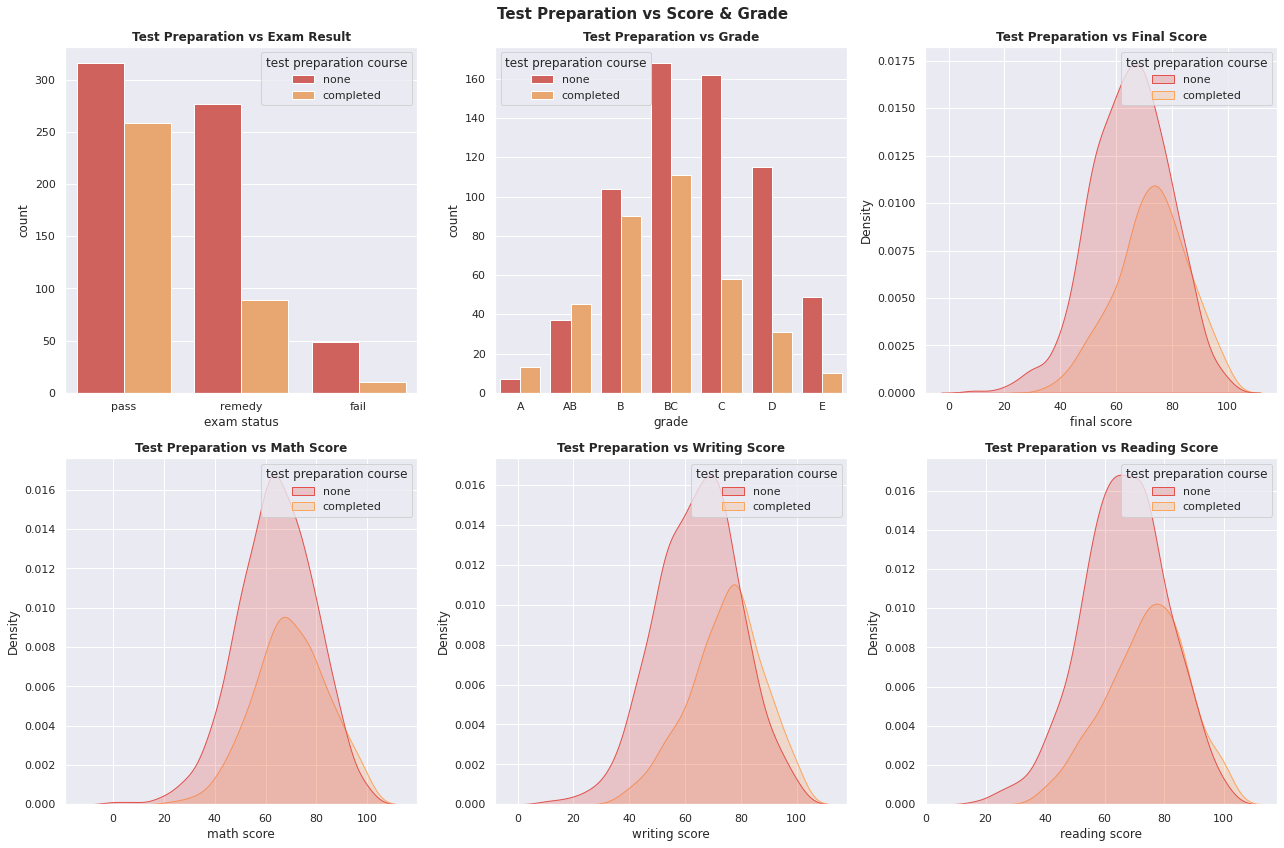

In [23]:
sns.set_palette("Spectral")
# visualize data using plt.subplot()
plt.figure(figsize=(18,12))
plt.suptitle('Test Preparation vs Score & Grade', fontweight='bold', fontsize=15)

# gender vs exam result
plt.subplot(231)
sns.countplot(data=df, x='exam status', hue='test preparation course')
plt.title('Test Preparation vs Exam Result', fontweight='bold')

# gender vs grade
plt.subplot(232)
sns.countplot(data=df, x='grade', hue='test preparation course', order=df['grade'].sort_values().unique())
plt.title('Test Preparation vs Grade', fontweight='bold')

# gender vs final score
plt.subplot(233)
sns.kdeplot(data=df, x='final score', hue='test preparation course', shade=True)
plt.title('Test Preparation vs Final Score', fontweight='bold')

# gender vs math score
plt.subplot(234)
sns.kdeplot(data=df, x='math score', hue='test preparation course', shade=True)
plt.title('Test Preparation vs Math Score', fontweight='bold')

# gender vs writing score
plt.subplot(235)
sns.kdeplot(data=df, x='writing score', hue='test preparation course', shade=True)
plt.title('Test Preparation vs Writing Score', fontweight='bold')

# gender vs reading score
plt.subplot(236)
sns.kdeplot(data=df, x='reading score', hue='test preparation course', shade=True)
plt.title('Test Preparation vs Reading Score', fontweight='bold')

plt.tight_layout()
plt.show()

**Answer:** It looks like taking test preparation course could help students to pass the exam and get quite high scores. But we can also see that there are some students that failed in the exam even they have taken test preparation course. Besides, taking test preparation course seems cannot 100% guarantee students to get a high scores since we found there are students that didn't take test preparation course could achieved a great scores too.

<a id="22"></a>
**Q: Does the educational background of their parents affect to their performance?**

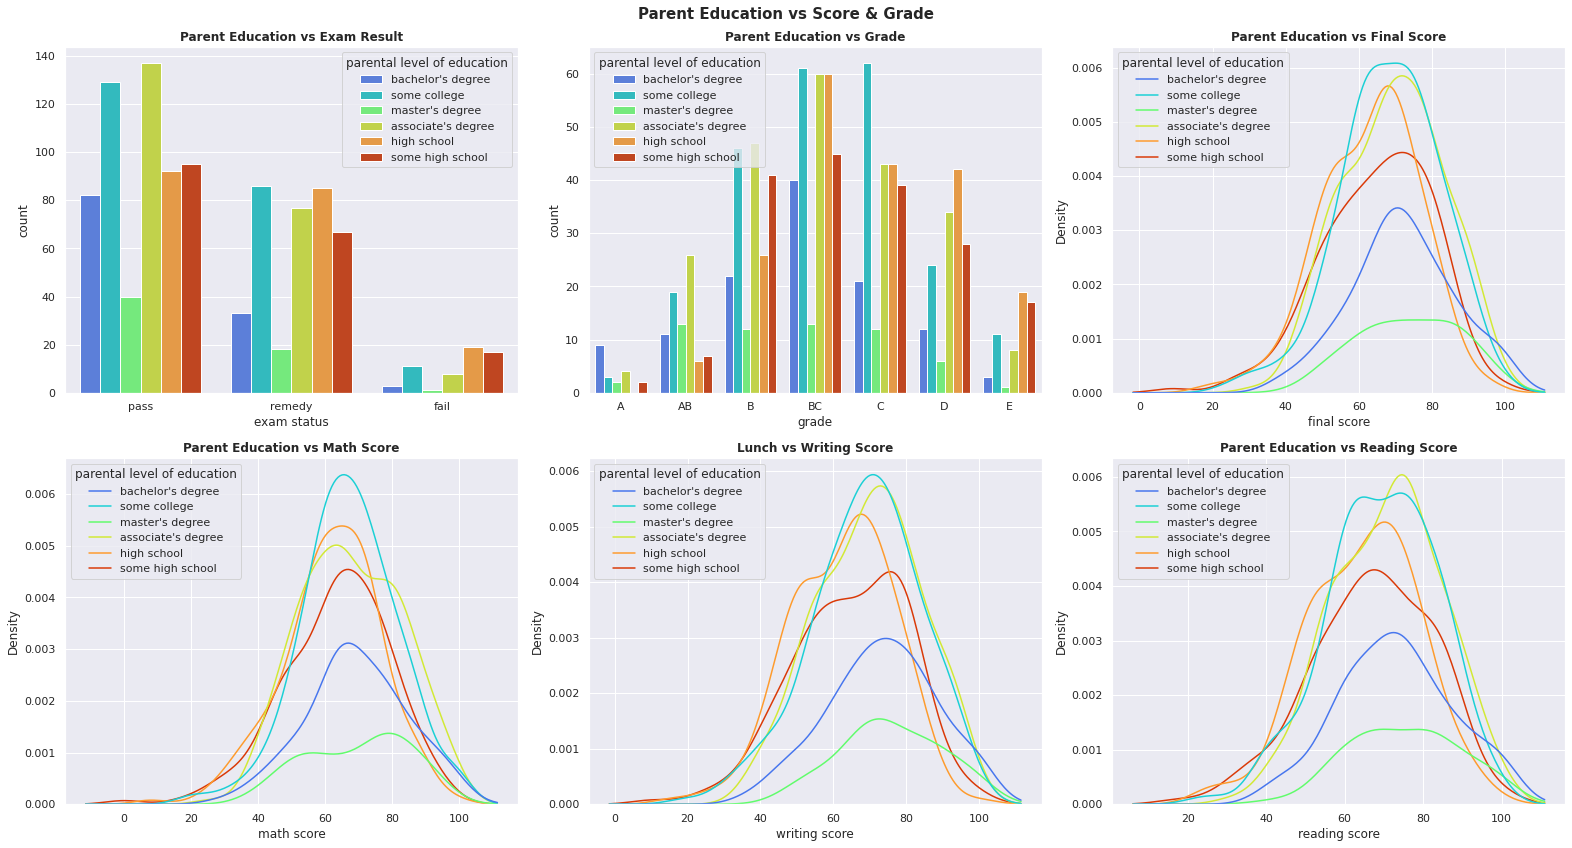

In [24]:
sns.set_palette("turbo")
sns.set_context("notebook",font_scale=1)
# visualize data using plt.subplot()
plt.figure(figsize=(22,12))
plt.suptitle('Parent Education vs Score & Grade', fontweight='bold', fontsize=15)

# gender vs exam result
plt.subplot(231)
sns.countplot(data=df, x='exam status', hue='parental level of education')
plt.title('Parent Education vs Exam Result', fontweight='bold')

# gender vs grade
plt.subplot(232)
ax = sns.countplot(data=df, x='grade', hue='parental level of education', order=df['grade'].sort_values().unique())
ax.legend_._set_loc(2)
plt.title('Parent Education vs Grade', fontweight='bold')

# gender vs final score
plt.subplot(233)
ax = sns.kdeplot(data=df, x='final score', hue='parental level of education', shade=False, common_grid=True)
ax.legend_._set_loc(2)
plt.title('Parent Education vs Final Score', fontweight='bold')


# gender vs math score
plt.subplot(234)
ax = sns.kdeplot(data=df, x='math score', hue='parental level of education', shade=False, common_grid=True,)
ax.legend_._set_loc(2)
plt.title('Parent Education vs Math Score', fontweight='bold')

# gender vs writing score
plt.subplot(235)
ax = sns.kdeplot(data=df, x='writing score', hue='parental level of education', shade=False, common_grid=True,)
ax.legend_._set_loc(2)
plt.title('Lunch vs Writing Score', fontweight='bold')

# gender vs reading score
plt.subplot(236)
ax = sns.kdeplot(data=df, x='reading score', hue='parental level of education', shade=False, common_grid=True,)
ax.legend_._set_loc(2)
plt.title('Parent Education vs Reading Score', fontweight='bold')

plt.tight_layout()
plt.show()

**Answer:** student whose their parents have master's degree followed by parents with bachelor's and associate's degree tend to have a higher overall score and passing the exam. On the other side student whose their parents have some high school and high school tend to have a lower overall score.

<a id="23"></a>
**Q: How's subjects score contribute to the final score?**

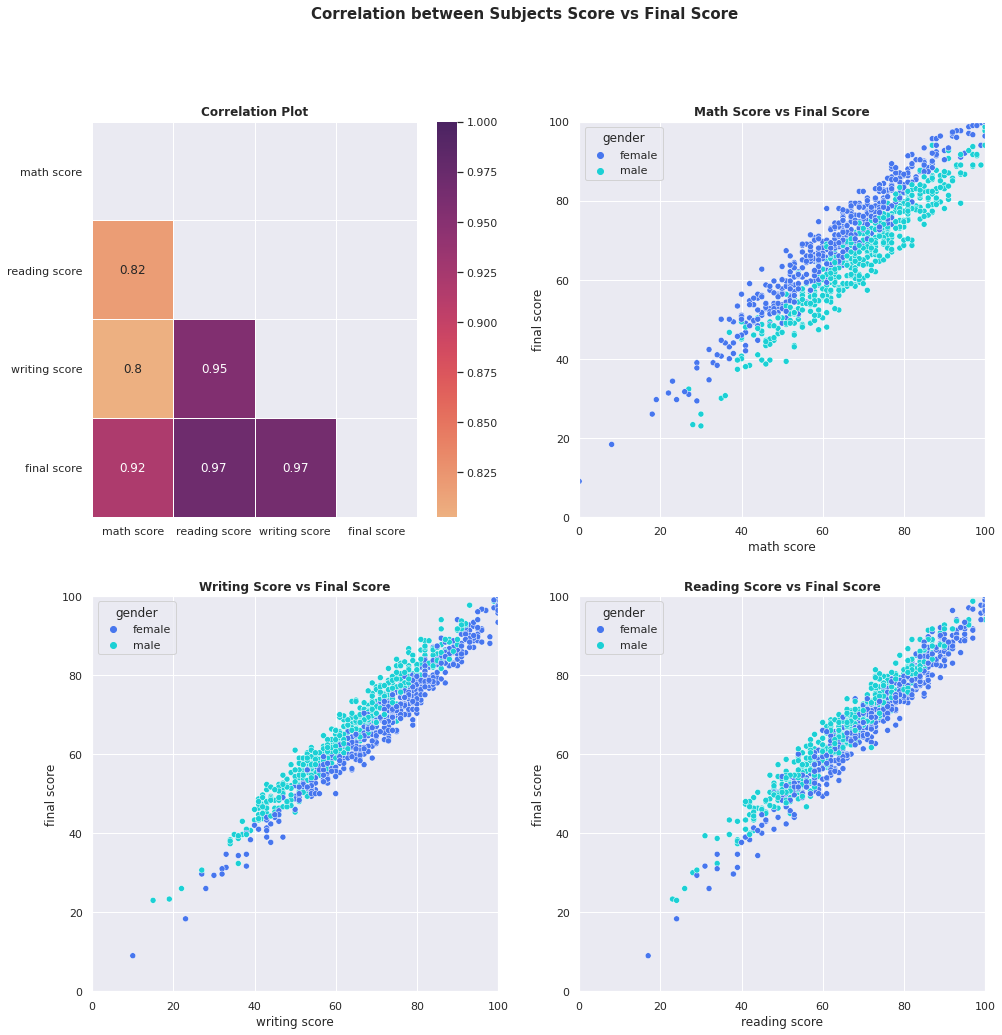

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16))
fig.suptitle('Correlation between Subjects Score vs Final Score', fontweight='bold', fontsize=15)

# correlation plot
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2g', linewidths=.5, cmap='flare', vmax=1, ax=ax[0,0])
ax[0,0].set_yticklabels(['math score', 'reading score', 'writing score', 'final score'], rotation=0)
ax[0,0].set_title('Correlation Plot', fontweight='bold')


sns.scatterplot(ax=ax[0,1], data=df, x='math score', y='final score', hue='gender')
ax[0,1].set_title('Math Score vs Final Score', fontweight='bold')
ax[0,1].set_xlim(0,100)
ax[0,1].set_ylim(0,100)

sns.scatterplot(ax=ax[1,0], data=df, x='writing score', y='final score', hue='gender')
ax[1,0].set_title('Writing Score vs Final Score', fontweight='bold')
ax[1,0].set_xlim(0,100)
ax[1,0].set_ylim(0,100)

sns.scatterplot(ax=ax[1,1], data=df, x='reading score', y='final score', hue='gender')
ax[1,1].set_title('Reading Score vs Final Score', fontweight='bold')
ax[1,1].set_xlim(0,100)
ax[1,1].set_ylim(0,100)

plt.tight_layout
plt.show()


**Answer:** We can see there are *high positive correlation* between each subject score toward final score. It means every subjects score matters to final score. If students want to achieve a high score, they need to scored higher in every subjects.

<a id="24"></a>
**Q: Who is perform better on the exam?**

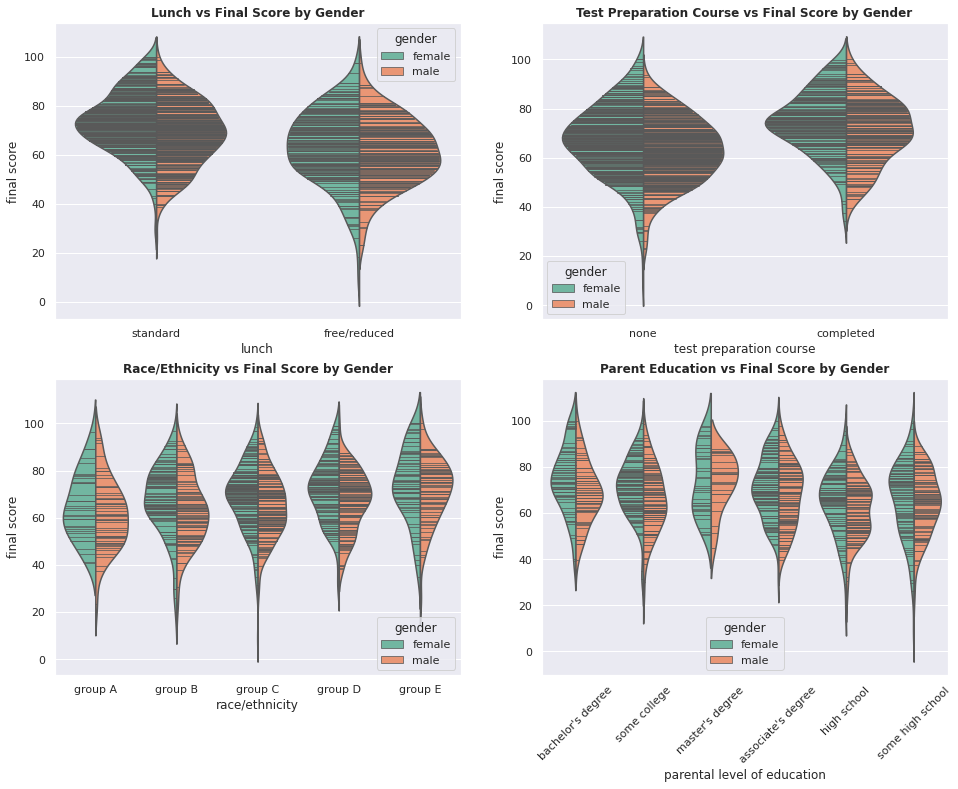

In [26]:
fig, ax = plt.subplots(2,2, figsize=(16,12))

sns.set_palette("Set2")

sns.violinplot(data=df, x='lunch', y='final score', hue='gender', inner='stick', split=True, ax=ax[0,0])
ax[0,0].set_title('Lunch vs Final Score by Gender', fontweight='bold')

sns.violinplot(data=df, x='test preparation course', y='final score', hue='gender', inner='stick', split=True, ax=ax[0,1])
ax[0,1].set_title('Test Preparation Course vs Final Score by Gender', fontweight='bold')

sns.violinplot(data=df, x='race/ethnicity', y='final score', hue='gender', inner='stick', split=True, ax=ax[1,0],\
               order=df['race/ethnicity'].sort_values().unique())
ax[1,0].set_title('Race/Ethnicity vs Final Score by Gender', fontweight='bold')

sns.violinplot(data=df, x='parental level of education', y='final score', hue='gender', inner='stick', split=True, ax=ax[1,1])
ax[1,1].set_xticklabels(
    ['bachelor\'s degree', 'some college', 'master\'s degree', 'associate\'s degree', 'high school', 'some high school'], 
    rotation=45)
ax[1,1].set_title('Parent Education vs Final Score by Gender', fontweight='bold')

plt.show()

**Answer:** Female students whose their parent hold master's degree perform better on the exam, followed by whose their parent hold bachelor's and associate's degree. Also, taking test preparation course and have a standard lunch resulted the better result on exam. But among all facts that we got, we can see that by all variables, female students always perform better than male students. So, female students is the winner here.

<a id="25"></a>
## Socio-Economic Analysis
Here we will pair race/ethnicity variable with lunch and parental level of education variables. This is because both variables is related to one's economic condition. We could asssume that if people taking some degree they are tend to have a higher economy status, since taking degree at some college will cost quite a lot money (let's exclude scholarship schema here). Also as we discussed before (at Data Understanding part), students with standard lunch could means that their economy status was better than the other one. 

So, let's begin!

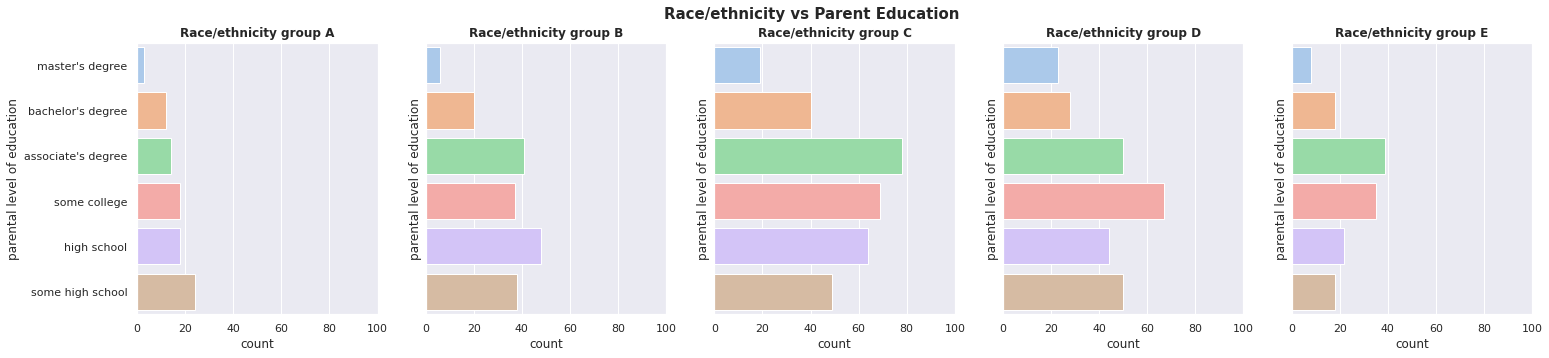

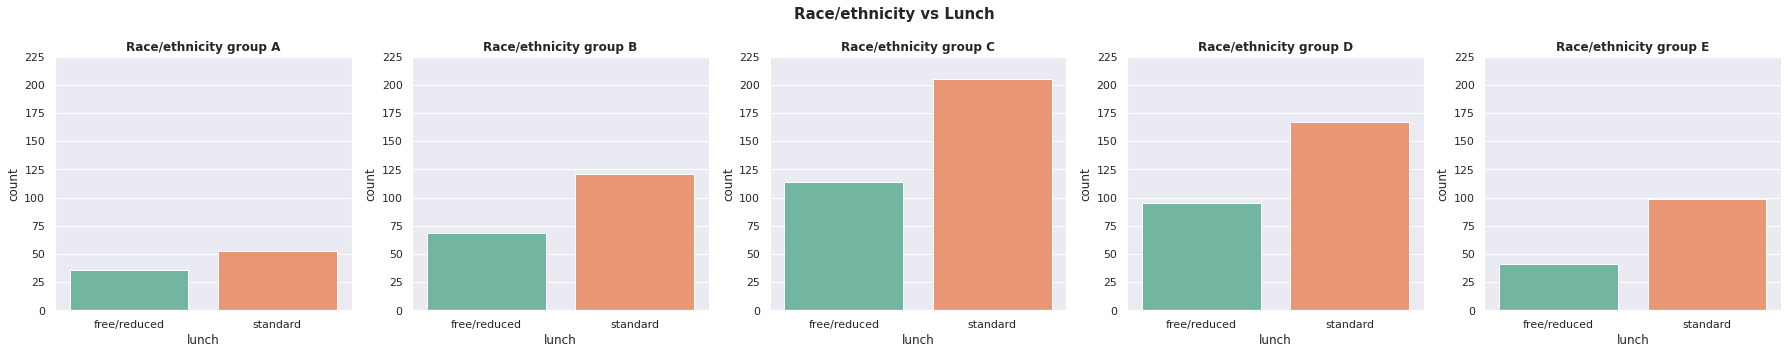

In [27]:
races = df['race/ethnicity'].sort_values().unique()

fig, ax = plt.subplots(1,5, figsize=(25,5), sharey=True)
fig.suptitle('Race/ethnicity vs Parent Education', fontsize=15, fontweight='bold')
for col,race in enumerate(races):
    order = ['master\'s degree', 'bachelor\'s degree', 'associate\'s degree', 'some college', 'high school', 'some high school']
    sns.countplot(data=df[df['race/ethnicity'] == race], y='parental level of education', ax=ax[col], order=order, palette='pastel')
    ax[col].set_title('Race/ethnicity {}'.format(race), fontweight='bold')
    ax[col].set_xlim(0,100)

fig, ax = plt.subplots(1,5, figsize=(25,5))
fig.suptitle('Race/ethnicity vs Lunch', fontsize=15, fontweight='bold')
for col,race in enumerate(races):    
    sns.countplot(data=df[df['race/ethnicity'] == race], x='lunch', ax=ax[col], palette='Set2', order=df['lunch'].sort_values().unique())
    ax[col].set_title('Race/ethnicity {}'.format(race), fontweight='bold')
    ax[col].set_ylim(0,225)
    
plt.tight_layout()
plt.show()

Interestingly, each race/ethnicity shows a pattern when its paired with `parent level education` and `lunch` variables. But since the total students of each race/ethnicity is not in the same scale, let's take a percentage value of *having a college degree* (associate-master degree) and *having a standard lunch* category for each race/ethnicity.

Then, since group E race perform better among the other races in the exam, let's understand a bit further whether both variables parent level education and lunch could gives us an idea about their socio-economic condition.

In [28]:
print('Percentage of each race/ethnicity having a college degree')
print('---------------------------------------------------------')
college = ['master\'s degree', 'bachelor\'s degree', 'associate\'s degree']

for race in races:    
    df_race = df[df['race/ethnicity'] == race]
    percentage = (len(df_race[df_race['parental level of education'].isin(college)])/len(df_race)) * 100
    print('Race/ethnicity {}: {:.2f}%'.format(race, percentage))

Percentage of each race/ethnicity having a college degree
---------------------------------------------------------
Race/ethnicity group A: 32.58%
Race/ethnicity group B: 35.26%
Race/ethnicity group C: 42.95%
Race/ethnicity group D: 38.55%
Race/ethnicity group E: 46.43%


In [29]:
print('Percentage of each race/ethnicity having a standard lunch')
print('---------------------------------------------------------')

for race in races:    
    df_race = df[df['race/ethnicity'] == race]
    percentage = (len(df_race[df_race['lunch'] == 'standard'])/len(df_race)) * 100
    print('Race/ethnicity {}: {:.2f}%'.format(race, percentage))

Percentage of each race/ethnicity having a standard lunch
---------------------------------------------------------
Race/ethnicity group A: 59.55%
Race/ethnicity group B: 63.68%
Race/ethnicity group C: 64.26%
Race/ethnicity group D: 63.74%
Race/ethnicity group E: 70.71%


From the output above, we can confirm that having a college degree and standard lunch could give us a view about their socio-economic condition. As we can see, the group E race has the largest percentage of having college degree and standard lunch it could be means that this race tend to have a better socio-economic condition among the other race.

<a id="26"></a>
# Conclusion

## 👩👩

Female students from `group E` race/ethnicity has the best performance on the exam among another races. While this race population is at the bottom two, it looks like that the parents raise their children well. It proven by their level of education and their students lunch. We can assume that the higher level of education of student's parents, the better education culture they applied to their children.

<a id="27"></a>
# Inspiration

- [https://www.kaggle.com/bhartiprasad17/student-academic-performance-analysis](https://www.kaggle.com/bhartiprasad17/student-academic-performance-analysis)
- [https://www.kaggle.com/mrigendraagrawal/how-to-score-more-on-tests](https://www.kaggle.com/mrigendraagrawal/how-to-score-more-on-tests)

# Thank you for reading! Спасибо!
### Please don't forget to upvote if you like it 😉